In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import plotly.figure_factory as ff

In [2]:
# Load model
pickleFile = open("mushroom_rfmodel.pkl", 'rb')
best_model = pickle.load(pickleFile)
pickleFile.close()

# Load data
pickleFile = open("clean_mushroom_data.pkl", 'rb')
mushrooms = pickle.load(pickleFile)
pickleFile.close()

In [3]:
#### Format features, targets
X = mushrooms.drop(columns='class')
X = ce.OneHotEncoder(use_cat_names=True).fit_transform(X)
y = mushrooms['class'].replace({'p':0, 'e':1})

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    test_size=.2, stratify=y)


In [48]:
model_predictions = best_model.predict(X_test)

print('\n\n', classification_report(y_test, model_predictions, target_names=['0-Poisonous', '1-Edible']))




               precision    recall  f1-score   support

 0-Poisonous       1.00      1.00      1.00       783
    1-Edible       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [50]:
con_matrix = pd.DataFrame(confusion_matrix(y_test, model_predictions),
                                columns=['Predicted Poison', 'Predicted Edible'], 
                                index=['Actual Poison', 'Actual Edible'])
con_matrix

,Predicted Poison,Predicted Edible
Actual Poison,783,0
Actual Edible,0,842


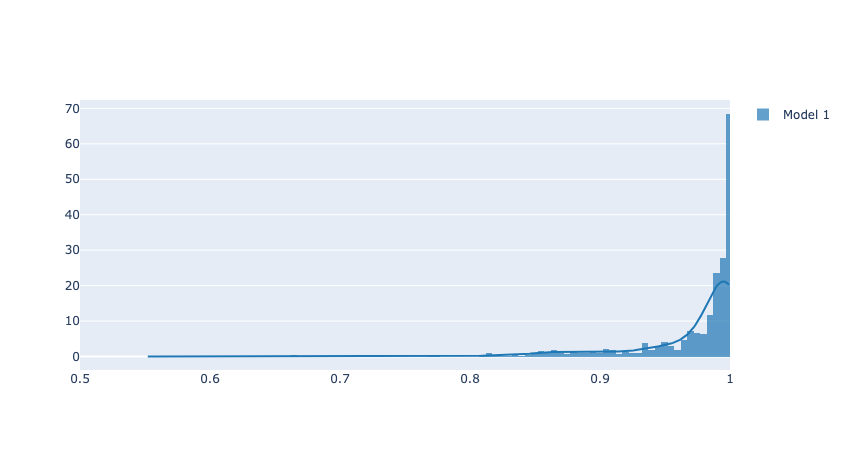

In [43]:
# Add histogram data
x1 = [i.max() for i in best_model.predict_proba(X_test)]

# Group data together
hist_data = [x1]

group_labels = ['Model 1']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.005, show_rug = False)
fig.update_xaxes(range=[.5, 1])
fig.show()